In [1]:
import pandas
import numpy
from matplotlib import pyplot

In [2]:
telco = pandas.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
for i in telco.columns:
    print(telco[i].value_counts())
    print()

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

gender
Male      3555
Female    3488
Name: count, dtype: int64

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity
No                     3498
Yes                    2019
No internet serv

In [6]:
telco.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
def preProcessingStrategy(dataFrame: pandas.DataFrame) -> pandas.DataFrame:
    df = pandas.DataFrame.copy(dataFrame)
    # one hot encoding
    df = pandas.get_dummies(
        df,
        columns=[
            'gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
            'PaymentMethod', 'Churn'
        ],
        drop_first=True,
    )
    
    return df

In [8]:
cleaned_df: pandas.DataFrame = preProcessingStrategy(telco)

In [9]:
cleaned_df

,customerID,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,1,29.85,29.85,False,False,True,False,False,True,...,False,False,False,False,False,True,False,True,False,False
1,5575-GNVDE,34,56.95,1889.5,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
2,3668-QPYBK,2,53.85,108.15,True,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,True
3,7795-CFOCW,45,42.30,1840.75,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
4,9237-HQITU,2,70.70,151.65,False,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,84.80,1990.5,True,False,True,True,True,False,...,True,False,True,True,False,True,False,False,True,False
7039,2234-XADUH,72,103.20,7362.9,False,False,True,True,True,False,...,True,False,True,True,False,True,True,False,False,False
7040,4801-JZAZL,11,29.60,346.45,False,False,True,True,False,True,...,False,False,False,False,False,True,False,True,False,False
7041,8361-LTMKD,4,74.40,306.6,True,True,True,False,True,False,...,False,False,False,False,False,True,False,False,True,True


In [10]:
cleaned_df.columns

Index(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')

In [11]:
id = cleaned_df['customerID'].copy()
cleaned_df = cleaned_df.drop(columns=["customerID"], axis=1).copy()
# cleaned_df = cleaned_df.astype(float)

cleaned_df.replace({'Yes': 1, 'No': 0}, inplace=True)
cleaned_df.replace({'True': 1, 'False': 0}, inplace=True)


In [12]:
cleaned_df

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,34,56.95,1889.5,True,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,2,53.85,108.15,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,45,42.30,1840.75,True,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,2,70.70,151.65,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.5,True,False,True,True,True,False,True,...,True,False,True,True,False,True,False,False,True,False
7039,72,103.20,7362.9,False,False,True,True,True,False,True,...,True,False,True,True,False,True,True,False,False,False
7040,11,29.60,346.45,False,False,True,True,False,True,False,...,False,False,False,False,False,True,False,True,False,False
7041,4,74.40,306.6,True,True,True,False,True,False,True,...,False,False,False,False,False,True,False,False,True,True


In [13]:
# cleaned_df.to_csv('cleaned_data.csv', index=False)

In [14]:
# cleaned_df = pandas.read_csv('cleaned_data.csv')

In [15]:
(cleaned_df == '').sum()

tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
SeniorCitizen_1                          0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMo

In [16]:
cleaned_df["tenure"].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

In [17]:
for col in cleaned_df.columns:
    bad_values = cleaned_df[col].unique()
    print(f"{col}: {bad_values}")

tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
gender_Male: [False  True]
SeniorCitizen_1: [False  True]
Partner_Yes: [ True False]
Dependents_Yes: [False  True]
PhoneService_Yes: [False  True]
MultipleLines_No phone service: [ True False]
MultipleLines_Yes: [False  True]
InternetService_Fiber optic: [False  True]
InternetService_No: [False  True]
OnlineSecurity_No internet service: [False  True]
OnlineSecurity_Yes: [False  True]
OnlineBackup_No internet service: [False  True]
OnlineBackup_Yes: [ True False]
DeviceProtection_No internet service: [False  True]
DeviceProtection_Yes: [False  True]
TechSupport_No internet service: [False  True]
TechSupport_Yes: [False  True]
Strea

In [18]:
cleaned_df['TotalCharges'] = pandas.to_numeric(cleaned_df['TotalCharges'], errors='coerce').fillna(0.0)

In [19]:
cleaned_df

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,34,56.95,1889.50,True,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,2,53.85,108.15,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,45,42.30,1840.75,True,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,2,70.70,151.65,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,True,False,True,True,True,False,True,...,True,False,True,True,False,True,False,False,True,False
7039,72,103.20,7362.90,False,False,True,True,True,False,True,...,True,False,True,True,False,True,True,False,False,False
7040,11,29.60,346.45,False,False,True,True,False,True,False,...,False,False,False,False,False,True,False,True,False,False
7041,4,74.40,306.60,True,True,True,False,True,False,True,...,False,False,False,False,False,True,False,False,True,True


In [20]:
X = cleaned_df.drop(columns=['Churn_Yes'], axis=1)
y = cleaned_df['Churn_Yes']

In [21]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42
)

In [22]:
X_train

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6607,1,25.30,25.30,True,False,False,True,False,True,False,...,False,False,False,False,False,False,True,False,True,False
2598,7,75.15,525.00,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
2345,4,20.05,85.50,False,False,False,True,True,False,False,...,True,False,True,False,False,False,True,False,False,False
4093,29,76.00,2215.25,False,False,False,False,True,False,True,...,False,False,False,False,False,False,True,True,False,False
693,3,75.10,270.70,False,False,False,False,True,False,True,...,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,95.00,95.00,True,False,True,False,True,False,False,...,False,True,False,True,False,False,True,False,True,False
5191,23,91.10,2198.30,False,False,True,True,True,False,True,...,False,True,False,True,False,True,True,True,False,False
5226,12,21.15,306.05,True,False,True,True,True,False,False,...,True,False,True,False,False,False,True,False,True,False
5390,12,99.45,1200.15,True,True,False,False,True,False,True,...,False,True,False,True,False,False,True,False,True,False


In [23]:
print(X_train.shape)
print(X_test.shape)

(5282, 30)
(1761, 30)


# Logistic Regression

In [24]:
from sklearn import linear_model

logistic_linear_model = linear_model.LogisticRegression(max_iter=1000)
logistic_linear_model.fit(X_train, y_train)


/Users/naveen1.mathur/Desktop/x/sftc/_learning/ml/mlp/ml-projects/_env_TELCO_CUSTOMER_CHURN/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [25]:
y_pred = logistic_linear_model.predict(X_test)
y_prob = logistic_linear_model.predict_proba(X_test)[:, 1]

In [26]:
y_pred

array([ True, False, False, ..., False,  True, False])

In [27]:
y_pred_prob = (y_prob >= 0.5).astype(int)

In [28]:
from sklearn import metrics

In [29]:
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
accuracy_prob = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_prob)
print(f"accuracy_prob \t: {accuracy_prob}")
print(f"accuracy \t: {accuracy}")

accuracy_prob 	: 0.8137421919363997
accuracy 	: 0.8137421919363997


# Decision Tree

In [30]:
from sklearn import tree

In [31]:
decision_tree_model = tree.DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X=X_train, y=y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
y_pred_dt = decision_tree_model.predict(X=X_test)

In [33]:
accuracy_dt = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_dt)
print(f"accuracy_dt: {accuracy_dt}")

accuracy_dt: 0.7257240204429302


# visualize decision tree

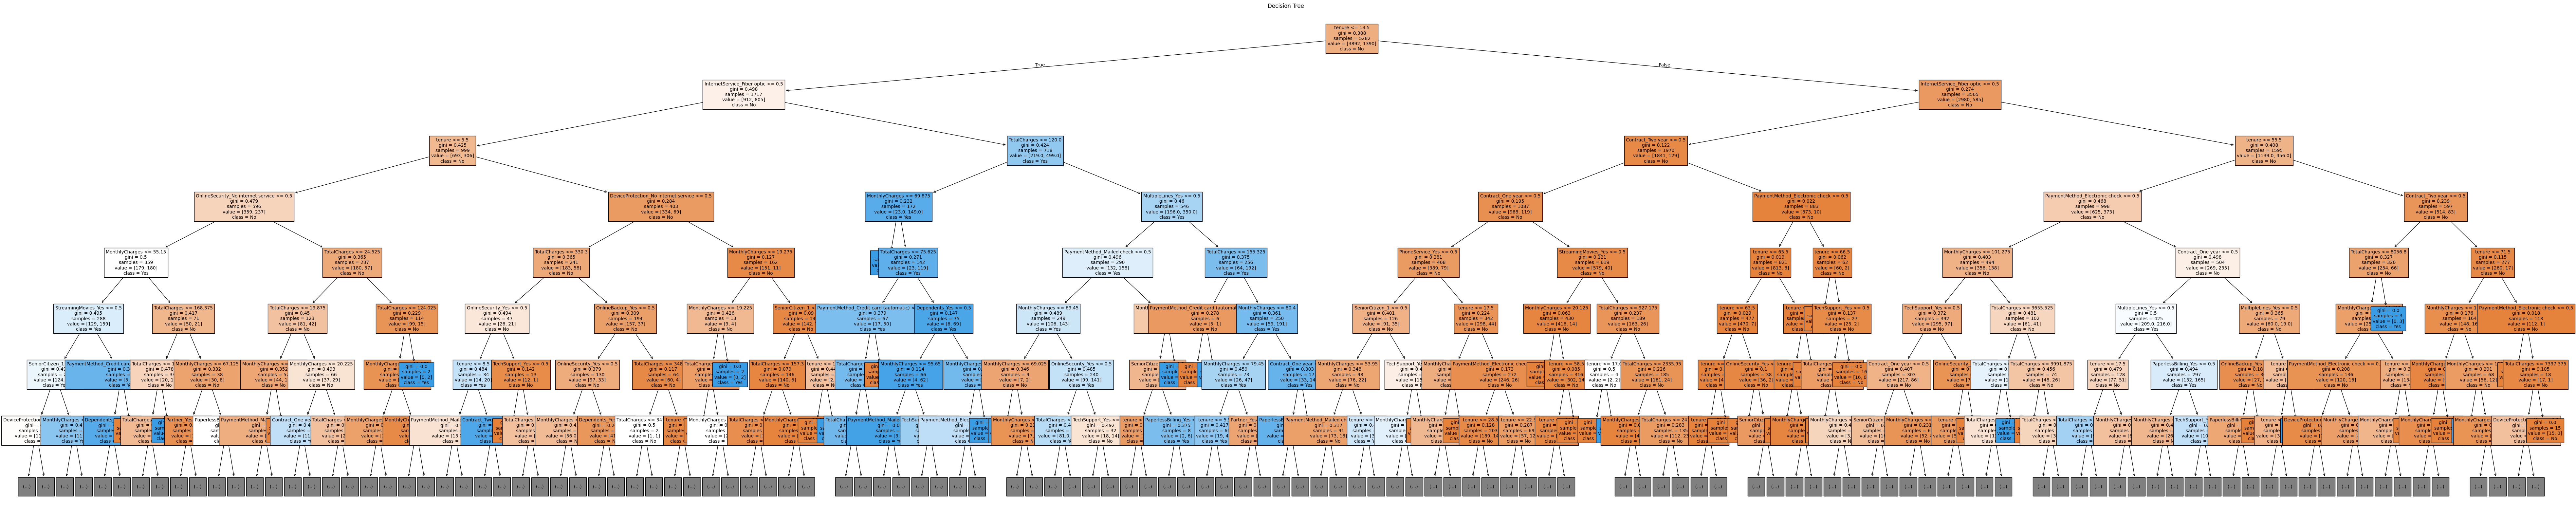

In [34]:
pyplot.figure(figsize=(100, 20))

# from sklearn 
tree.plot_tree(decision_tree_model, 
    feature_names=X_train.columns, 
    class_names=['No', 'Yes'], 
    filled=True, 
    max_depth=7, # limiting depth
    fontsize=10
)
pyplot.title("Decision Tree")
pyplot.show()

# random forest

In [35]:
from sklearn import ensemble

In [36]:
random_forest_model = ensemble.RandomForestClassifier(
    random_state=42,
    max_depth=5,
)

In [37]:
random_forest_model.fit(X=X_train, y=y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [38]:
y_pred_rf = random_forest_model.predict(X=X_test)

In [39]:
accuracy_rf = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_rf)
print(f"accuracy_rf: {accuracy_rf}")

accuracy_rf: 0.7932992617830777


# visualize a tree from random forest

In [40]:
print("Number of trees:", len(random_forest_model.estimators_))
print("Features used:", random_forest_model.n_features_in_)
print("Feature names:", X_train.columns)
print("Classes:", random_forest_model.classes_)
print("Feature importances:", random_forest_model.feature_importances_)


Number of trees: 100
Features used: 30
Feature names: Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')
Classes: [False  True]
Feature importances: [0.22585201 0.05453422 0.119

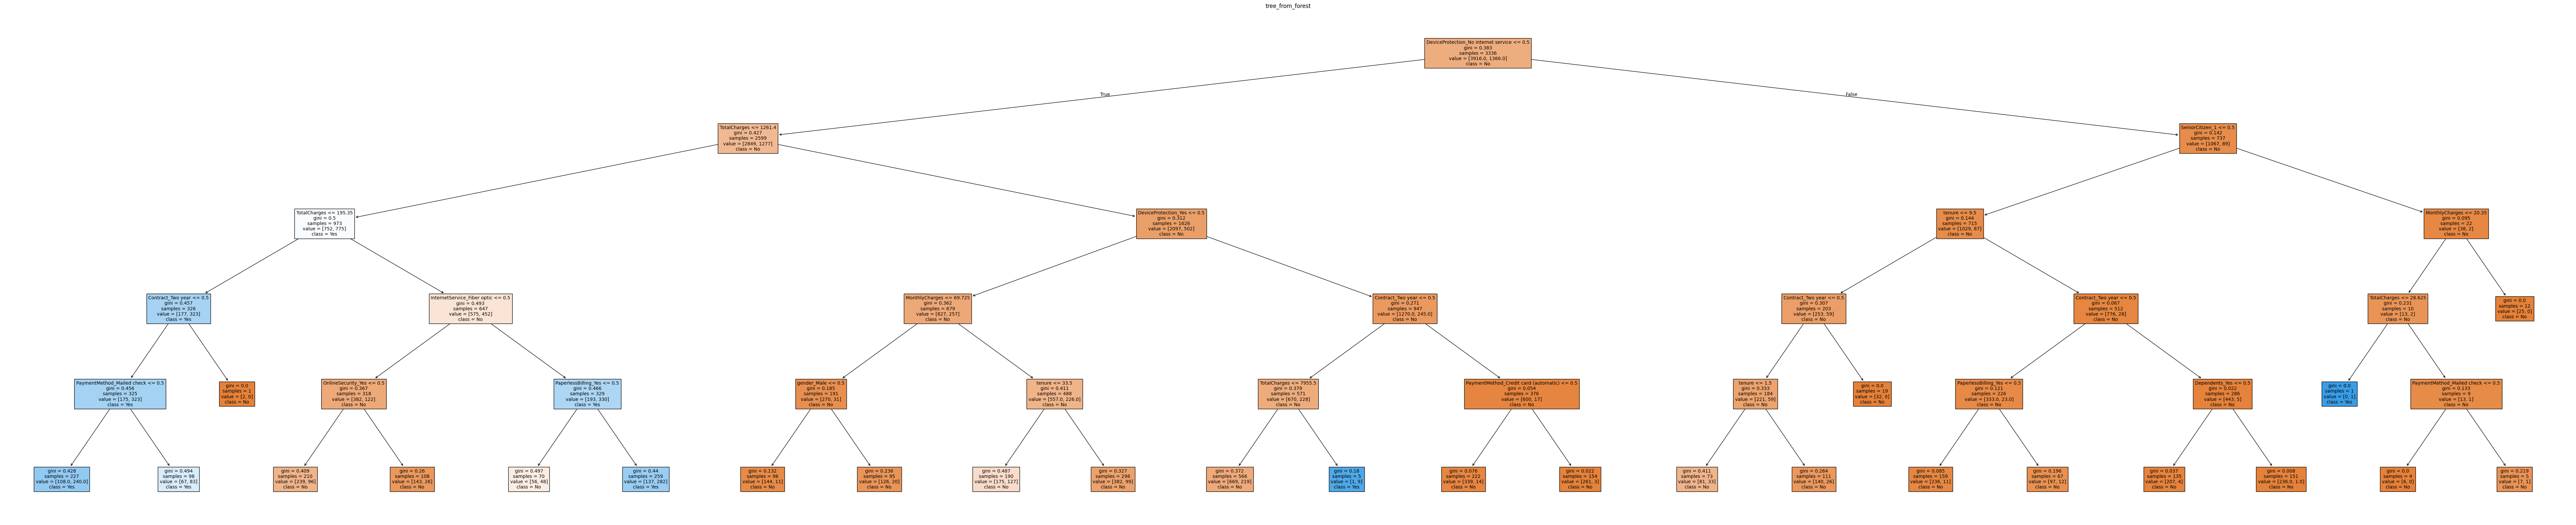

In [41]:
tree_from_forest = random_forest_model.estimators_[0]

pyplot.figure(figsize=(100, 20))

# from sklearn 
tree.plot_tree(tree_from_forest, 
    feature_names=X_train.columns, 
    class_names=['No', 'Yes'], 
    filled=True, 
    max_depth=7, # limiting depth
    fontsize=10
)
pyplot.title("tree_from_forest")
pyplot.show()